C:\Users\bably\anaconda3\Lib\site-packages\shapely\constructive.py:829: RuntimeWarning: invalid value encountered in normalize
  return lib.normalize(geometry, **kwargs)
C:\Users\bably\anaconda3\Lib\site-packages\shapely\constructive.py:829: RuntimeWarning: invalid value encountered in normalize
  return lib.normalize(geometry, **kwargs)


<Axes: >

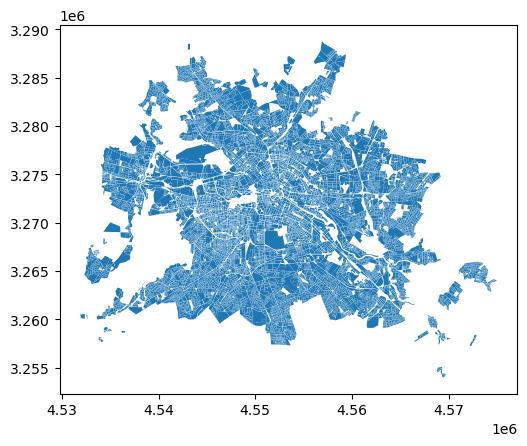

In [80]:
!pip install python-igraph
!pip install mapclassify

import pandas as pd
import geopandas as gpd
#import geopandas as gpd
from shapely.geometry import LineString, Point

#pip install dill
import dill

#pip install matplotlib

from shapely.geometry import shape
from shapely.validation import explain_validity

#Upload shapefiles
gdfStreets = gpd.read_file("C:\\Users\\bably\\OneDrive\\Personal\\University\\QSE\\Repository\\QSE_Data\\Data\\Shapefiles-2022\\Berlin\\TransportNetworkParts2006\\Streets.shp")
gdfZones = gpd.read_file("C:\\Users\\bably\\OneDrive\\Personal\\University\\QSE\\Repository\\Replication_Directories\\ARSW2015-toolkit-main\\ARSW2015-toolkit-main\\shapefile\\Berlin4matlab.shp")
#gdfUBahn06 = gpd.read_file("C:/Users/andre/Dropbox/_HUB_HerreraA/Course/Repository/QSE_Data/Shapefiles-2022/Berlin/TransportNetworkParts2006/UBahn2006_lines.shp")
gdfUBahn = gpd.read_file("C:\\Users\\bably\\OneDrive\\Personal\\University\\QSE\\Repository\\QSE_Data\\Data\\Shapefiles-2022\\Berlin\\TransportNetworkParts2006\\UBahn2006_lines.shp")


gdfStreets = gdfStreets.to_crs(3035)
gdfZones = gdfZones.to_crs(3035)
gdfUBahn = gdfUBahn.to_crs(3035)
#gdfUBahn06 = gdfUBahn06.to_crs(3035)

#explain_validity(gdfZones)

#Explore zones
gdfZones.plot()

In [81]:
# Accessing the information of the segment in the U5 line that goes from Schillingstraße to Alexanderplatz 
specific_line = gdfUBahn.geometry.iloc[27]  # Adjust the index as needed to select the right line

# Get the coordinates of the end point
starting_point_coords = specific_line.coords[0]   # This gets the first point's coordinates
ending_point_coords = specific_line.coords[-1]  # This gets the last point's coordinates

# The ending_point_coords variable now holds a tuple (x, y) of the coordinates
print("Starting point coordinates:", starting_point_coords)  # Print out the starting point coordinates
print("Ending point coordinates:", ending_point_coords)  # Print out the ending point coordinates
gdfUBahn.geometry[27]
gdfUBahn.iloc[27]

Starting point coordinates: (4552643.498362472, 3273484.273967642)
Ending point coordinates: (4553116.370231355, 3273404.992579099)


Id                                                          0
Length                                             523.576925
Minutes                                              1.256585
geometry    LINESTRING (4552643.498362472 3273484.27396764...
Name: 27, dtype: object

In [82]:
# Create the stations in the U5 extension - Establish the coordinates
U55 = {
    'Station Name': ['Rotes Rathaus', 'Museumsinsel', 'Under den Linden'],
    'Latitude': [4552251.629163, 4551636.158862, 4550955.278284],
    'Longitude': [3273149.443465, 3272944.507044, 3272882.122129]
}
 
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    U55,
    geometry=[Point(xy) for xy in zip(U55['Longitude'], U55['Latitude'])]
)

# Set the initial CRS
gdf.crs = "EPSG:3035"

# Transform to EPSG:3035
gdf = gdf.to_crs(3035)

In [83]:
print(gdf)
#gdf.plot()

       Station Name      Latitude     Longitude  \
0     Rotes Rathaus  4.552252e+06  3.273149e+06   
1      Museumsinsel  4.551636e+06  3.272945e+06   
2  Under den Linden  4.550955e+06  3.272882e+06   

                          geometry  
0  POINT (3273149.443 4552251.629)  
1  POINT (3272944.507 4551636.159)  
2  POINT (3272882.122 4550955.278)  


In [84]:
# Preparing new lines connecting from each station
new_lines_data = [
    [(starting_point_coords), (gdf.loc[gdf['Station Name'] == 'Rotes Rathaus', 'Latitude'].values[0], gdf.loc[gdf['Station Name'] == 'Rotes Rathaus', 'Longitude'].values[0])],  # Alexanderplatz to Rotes Rathaus - I think it is the starting point of the starting_point_coords the one to use
    [(gdf.loc[gdf['Station Name'] == 'Rotes Rathaus', 'Latitude'].values[0], gdf.loc[gdf['Station Name'] == 'Rotes Rathaus', 'Longitude'].values[0]), (gdf.loc[gdf['Station Name'] == 'Museumsinsel', 'Latitude'].values[0], gdf.loc[gdf['Station Name'] == 'Museumsinsel', 'Longitude'].values[0])],
    [(gdf.loc[gdf['Station Name'] == 'Museumsinsel', 'Latitude'].values[0], gdf.loc[gdf['Station Name'] == 'Museumsinsel', 'Longitude'].values[0]), (gdf.loc[gdf['Station Name'] == 'Under den Linden', 'Latitude'].values[0], gdf.loc[gdf['Station Name'] == 'Under den Linden', 'Longitude'].values[0])], 
]

# Create LineString objects for new lines
new_lines = [LineString(line) for line in new_lines_data]

# Create a new GeoDataFrame for these lines, using the same CRS as your existing gdfUBahn
new_gdf = gpd.GeoDataFrame(geometry=new_lines, crs=3035)

# Ensuring connectivity (this step may require manual adjustments based on your network's specifics)

                                            geometry
0  LINESTRING (4552643.498 3273484.274, 4552251.6...
1  LINESTRING (4552251.629 3273149.443, 4551636.1...
2  LINESTRING (4551636.159 3272944.507, 4550955.2...
     Id       Length   Minutes  \
0     0    59.832559  0.143598   
1     0   324.178361  0.778028   
2     0   679.855723  1.631654   
3     0   616.431182  1.479435   
4     0   220.086474  0.528208   
..   ..          ...       ...   
209   0  1208.227206  2.899745   
210   0   429.365469  1.030477   
211   0   666.574625  1.599779   
212   0    22.565834  0.054158   
213   0    25.334722  0.060803   

                                              geometry  
0    LINESTRING (4547138.758 3270397.126, 4547134.1...  
1    LINESTRING (4551111.183 3270462.49, 4551164.26...  
2    LINESTRING (4551111.183 3270462.49, 4551117.41...  
3    LINESTRING (4551251.767 3270751.289, 4551179.7...  
4    LINESTRING (4548612.977 3270838.845, 4548405.4...  
..                                   

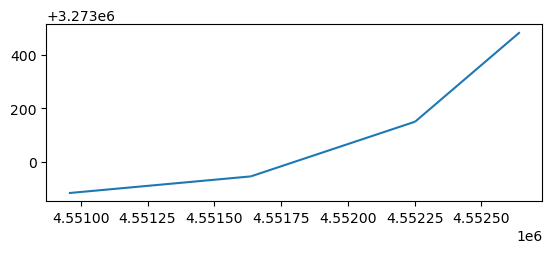

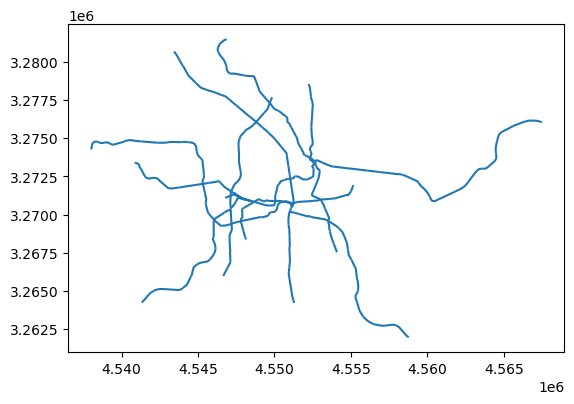

In [85]:
print(new_gdf)
new_gdf.plot()
gdfUBahn.plot()  #This is before appending the extension of the U5

print(gdfUBahn)

,Id,Length,Minutes,geometry
0,0.0,59.832559,0.143598,"LINESTRING (4547138.758 3270397.126, 4547134.1..."
1,0.0,324.178361,0.778028,"LINESTRING (4551111.183 3270462.49, 4551164.26..."
2,0.0,679.855723,1.631654,"LINESTRING (4551111.183 3270462.49, 4551117.41..."
3,0.0,616.431182,1.479435,"LINESTRING (4551251.767 3270751.289, 4551179.7..."
4,0.0,220.086474,0.528208,"LINESTRING (4548612.977 3270838.845, 4548405.4..."
...,...,...,...,...
212,0.0,22.565834,0.054158,"LINESTRING (4550656.396 3270829.992, 4550655.0..."
213,0.0,25.334722,0.060803,"LINESTRING (4550655.004 3270852.519, 4550653.4..."
214,NaN,NaN,NaN,"LINESTRING (4552643.498 3273484.274, 4552251.6..."
215,NaN,NaN,NaN,"LINESTRING (4552251.629 3273149.443, 4551636.1..."


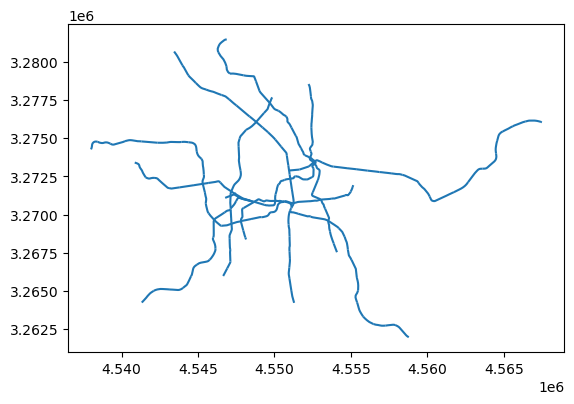

In [86]:
# Adding the U5 extension to the U-Bahn network
gdfUBahn = pd.concat([gdfUBahn, new_gdf], ignore_index=True)
gdfUBahn.plot()

gdfUBahn


In [87]:
# It is correct and only 3 stations were added to close the gap between 
#Brandenburger Tor and Alexanderplatz:
# Museuminsel, Unter den Linden, and Rotes Rathaus (2021)

In [88]:
#Fill in missing information:
gdfUBahn.loc[pd.isna(gdfUBahn['Length']), 'Length'] = gdfUBahn[pd.isna(gdfUBahn['Length'])].geometry.length
gdfUBahn.loc[pd.isna(gdfUBahn['Minutes']), 'Minutes'] = (gdfUBahn.loc[pd.isna(gdfUBahn['Minutes']), 'Length'] * 0.06) / 25


In [89]:
#Now let's create the U3 extension:

In [90]:
# Just taking a look at the data structure
# Display the first few rows of the UBahn GeoDataFrame
print(gdfUBahn.head())

# Check what columns are available in the dataset
print(gdfUBahn.columns)

    Id      Length   Minutes  \
0  0.0   59.832559  0.143598   
1  0.0  324.178361  0.778028   
2  0.0  679.855723  1.631654   
3  0.0  616.431182  1.479435   
4  0.0  220.086474  0.528208   

                                            geometry  
0  LINESTRING (4547138.758 3270397.126, 4547134.1...  
1  LINESTRING (4551111.183 3270462.49, 4551164.26...  
2  LINESTRING (4551111.183 3270462.49, 4551117.41...  
3  LINESTRING (4551251.767 3270751.289, 4551179.7...  
4  LINESTRING (4548612.977 3270838.845, 4548405.4...  
Index(['Id', 'Length', 'Minutes', 'geometry'], dtype='object')


In [91]:
for i in range(len(gdfUBahn.geometry)):
    print(gdfUBahn.geometry.iloc[i])
    print(gdfUBahn.geometry)
    

LINESTRING (4547138.758349413 3270397.125987789, 4547134.125298855 3270369.221490313, 4547134.444718077 3270337.6707365047)
0      LINESTRING (4547138.758 3270397.126, 4547134.1...
1      LINESTRING (4551111.183 3270462.49, 4551164.26...
2      LINESTRING (4551111.183 3270462.49, 4551117.41...
3      LINESTRING (4551251.767 3270751.289, 4551179.7...
4      LINESTRING (4548612.977 3270838.845, 4548405.4...
                             ...                        
212    LINESTRING (4550656.396 3270829.992, 4550655.0...
213    LINESTRING (4550655.004 3270852.519, 4550653.4...
214    LINESTRING (4552643.498 3273484.274, 4552251.6...
215    LINESTRING (4552251.629 3273149.443, 4551636.1...
216    LINESTRING (4551636.159 3272944.507, 4550955.2...
Name: geometry, Length: 217, dtype: geometry
LINESTRING (4551111.183250254 3270462.489869961, 4551164.263365887 3270548.26326205, 4551210.843963774 3270624.350854866, 4551225.426034318 3270652.1279478325, 4551236.022239129 3270685.851327249, 4551244

In [92]:
#Find the closest line to Krumme Lanke
import numpy as np
# Your approximate coordinates (replace with your actual coordinates)
# For example, if you have a point or a series of points
target_point = Point(4541325.908737, 3264248.221164)  # Replace with your coordinates

# Method 1: Find the closest LineString using distance calculation
distances = [line.distance(target_point) for line in gdfUBahn.geometry]
closest_idx = np.argmin(distances)
closest_line = gdfUBahn.geometry.iloc[closest_idx]

print(f"Closest line index: {closest_idx}")
print(f"Closest line: {closest_line}")

Closest line index: 14
Closest line: LINESTRING (4541324.506397915 3264245.035935135, 4541347.8712562695 3264274.2406685282, 4541375.146106688 3264305.252184428, 4541395.804590784 3264324.707041047, 4541443.53408928 3264379.1609286796, 4541468.0262878435 3264402.022562576, 4541490.751571854 3264427.9917851756, 4541549.91101036 3264494.2425226276, 4541585.578252365 3264533.6761474703, 4541612.15565237 3264562.0594074824, 4541684.155176964 3264655.123804567, 4541737.896528071 3264716.0268552466, 4541806.637895599 3264789.045856381, 4541856.5530965105 3264841.242348972, 4541909.726511888 3264885.074179546, 4541950.869235264 3264914.1141079455, 4541993.487762858 3264941.796139334, 4542048.506571608 3264977.208308781, 4542099.155343505 3265009.3943261136)


In [93]:
# Accessing the information about the segment in the U3 line that goes from Krumme Lanke to Mexikoplatz 
specific_line = gdfUBahn.geometry.iloc[14]  # Adjust the index as needed to select the right line

# Get the coordinates of the end point
starting_point_coords = specific_line.coords[0]   # This gets the first point's coordinates
ending_point_coords = specific_line.coords[-1]  # This gets the last point's coordinates

# The ending_point_coords variable now holds a tuple (x, y) of the coordinates
print("Starting point coordinates:", starting_point_coords)  # Print out the starting point coordinates
print("Ending point coordinates:", ending_point_coords)  # Print out the ending point coordinates
gdfUBahn.geometry[14]
gdfUBahn.iloc[14]

Starting point coordinates: (4541324.506397915, 3264245.035935135)
Ending point coordinates: (4542099.155343505, 3265009.3943261136)


Id                                                        0.0
Length                                            1095.430041
Minutes                                              2.629032
geometry    LINESTRING (4541324.506397915 3264245.03593513...
Name: 14, dtype: object

In [94]:
# Create one more station in U3 extension (Mexikoplatz) and create the coordinates
U31 = {
    'Station Name': ['Mexikoplatz'],
    'Latitude': [4540712.046794],
    'Longitude': [3263540.402689]
}
 
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    U31,
    geometry=[Point(xy) for xy in zip(U31['Longitude'], U31['Latitude'])]
)

# Set the initial CRS
gdf.crs = "EPSG:3035"

# Transform to EPSG:3035
gdf = gdf.to_crs(3035)

print(gdf)

  Station Name      Latitude     Longitude                         geometry
0  Mexikoplatz  4.540712e+06  3.263540e+06  POINT (3263540.403 4540712.047)


In [95]:
# Preparing new lines connecting from each station
#Check starting point. It's Krumme Lanke, yes.
#Coordinates: https://epsg.io/map#srs=3035-1149&x=4541327.858990&y=3264248.823883&z=17&layer=streets
print(starting_point_coords)

new_lines_data = [
    [(starting_point_coords), (gdf.loc[gdf['Station Name'] == 'Mexikoplatz', 'Latitude'].values[0], gdf.loc[gdf['Station Name'] == 'Mexikoplatz', 'Longitude'].values[0])],  #Krumme Lanke to Mexikoplatz 
]

# Create LineString objects for new lines
new_lines = [LineString(line) for line in new_lines_data]

# Create a new GeoDataFrame for these lines, using the same CRS as your existing gdfUBahn
new_gdf = gpd.GeoDataFrame(geometry=new_lines, crs=3035)


(4541324.506397915, 3264245.035935135)


                                            geometry
0  LINESTRING (4541324.506 3264245.036, 4540712.0...
      Id      Length   Minutes  \
0    0.0   59.832559  0.143598   
1    0.0  324.178361  0.778028   
2    0.0  679.855723  1.631654   
3    0.0  616.431182  1.479435   
4    0.0  220.086474  0.528208   
..   ...         ...       ...   
212  0.0   22.565834  0.054158   
213  0.0   25.334722  0.060803   
214  NaN  515.434705  1.237043   
215  NaN  648.693015  1.556863   
216  NaN  683.732579  1.640958   

                                              geometry  
0    LINESTRING (4547138.758 3270397.126, 4547134.1...  
1    LINESTRING (4551111.183 3270462.49, 4551164.26...  
2    LINESTRING (4551111.183 3270462.49, 4551117.41...  
3    LINESTRING (4551251.767 3270751.289, 4551179.7...  
4    LINESTRING (4548612.977 3270838.845, 4548405.4...  
..                                                 ...  
212  LINESTRING (4550656.396 3270829.992, 4550655.0...  
213  LINESTRING (4550655.004 

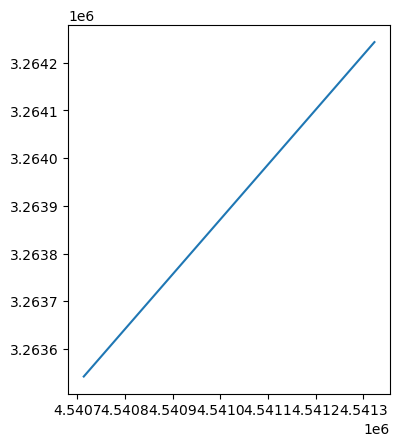

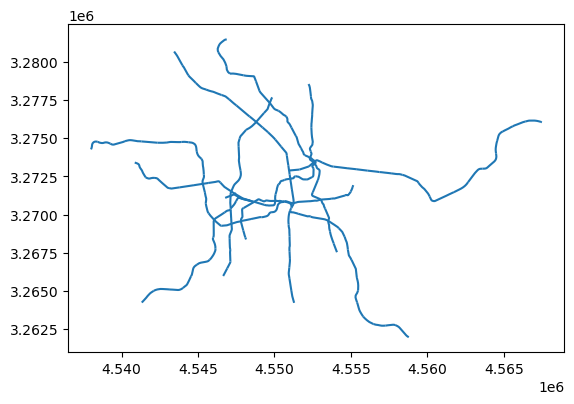

In [96]:
# Print without U3 extension
print(new_gdf)
new_gdf.plot()
gdfUBahn.plot()

print(gdfUBahn)

,Id,Length,Minutes,geometry
0,0.0,59.832559,0.143598,"LINESTRING (4547138.758 3270397.126, 4547134.1..."
1,0.0,324.178361,0.778028,"LINESTRING (4551111.183 3270462.49, 4551164.26..."
2,0.0,679.855723,1.631654,"LINESTRING (4551111.183 3270462.49, 4551117.41..."
3,0.0,616.431182,1.479435,"LINESTRING (4551251.767 3270751.289, 4551179.7..."
4,0.0,220.086474,0.528208,"LINESTRING (4548612.977 3270838.845, 4548405.4..."
...,...,...,...,...
213,0.0,25.334722,0.060803,"LINESTRING (4550655.004 3270852.519, 4550653.4..."
214,NaN,515.434705,1.237043,"LINESTRING (4552643.498 3273484.274, 4552251.6..."
215,NaN,648.693015,1.556863,"LINESTRING (4552251.629 3273149.443, 4551636.1..."
216,NaN,683.732579,1.640958,"LINESTRING (4551636.159 3272944.507, 4550955.2..."


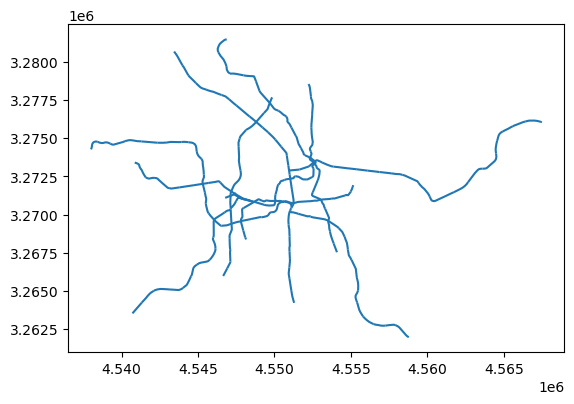

In [97]:
#Print with U3 extension
gdfUBahn = pd.concat([gdfUBahn, new_gdf], ignore_index=True)
gdfUBahn.plot()

gdfUBahn


In [101]:
#Filling in missing information:
gdfUBahn.loc[pd.isna(gdfUBahn['Length']), 'Length'] = gdfUBahn[pd.isna(gdfUBahn['Length'])].geometry.length
gdfUBahn.loc[pd.isna(gdfUBahn['Minutes']), 'Minutes'] = (gdfUBahn.loc[pd.isna(gdfUBahn['Minutes']), 'Length'] * 0.06) / 25

print(gdfUBahn)

      Id      Length   Minutes  \
0    0.0   59.832559  0.143598   
1    0.0  324.178361  0.778028   
2    0.0  679.855723  1.631654   
3    0.0  616.431182  1.479435   
4    0.0  220.086474  0.528208   
..   ...         ...       ...   
213  0.0   25.334722  0.060803   
214  NaN  515.434705  1.237043   
215  NaN  648.693015  1.556863   
216  NaN  683.732579  1.640958   
217  NaN  933.603116  2.240647   

                                              geometry  
0    LINESTRING (4547138.758 3270397.126, 4547134.1...  
1    LINESTRING (4551111.183 3270462.49, 4551164.26...  
2    LINESTRING (4551111.183 3270462.49, 4551117.41...  
3    LINESTRING (4551251.767 3270751.289, 4551179.7...  
4    LINESTRING (4548612.977 3270838.845, 4548405.4...  
..                                                 ...  
213  LINESTRING (4550655.004 3270852.519, 4550653.4...  
214  LINESTRING (4552643.498 3273484.274, 4552251.6...  
215  LINESTRING (4552251.629 3273149.443, 4551636.1...  
216  LINESTRING (4551

In [102]:
print(gdfUBahn.geometry.iloc[217])

LINESTRING (4541324.506397915 3264245.035935135, 4540712.046794 3263540.402689)


In [103]:
#Adding to Git:
#bash 
#git clone https://github.com/dbursy/qse_collaboration/tree/main/experiments

#cd repository-experiments



SyntaxError: invalid syntax (3211709527.py, line 3)